# ÁRBOLES DE CLASIFICACIÓN

#Por Santiago Sánchez de Aprende e Ingenia, adaptado por Ma. Margarita Orozco Gómez

#Alumno: Jonathan Emmanuel Garacía Hernández
#Matricula: A01423674

Noviembre 2023

Otra bibliografía consultada:

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

In [29]:
#Bibliotecas para tratamiento y Visualización de Datos

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
#Biblioteca para el Machine Lesarning
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Librería de árboles de decisiones
from sklearn.tree import DecisionTreeClassifier

#Bibliotecas para medidas del desempeño
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
!pip install plot_confusion_matrix
import plot_confusion_matrix

In [31]:
# Montamos el drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Definir una trayectoria de los archivos
fig_path = "/content/drive/My Drive/Mineria Datos/lider_tr9.xlsx"

In [33]:
#Abriendo base de datos
#IMPORTANTE: Para utilizar las técnicas de clasificación de la librería sklearn es necesario que todas las variables independientes estén codificadas como números

data = pd.read_excel(fig_path)
data

,hermanos,hijos,edad,escolaridad,activa,genero,lider
0,12,2,52,14,1,0,Líder
1,1,2,57,19,1,1,Líder
2,0,3,58,16,1,0,Líder
3,2,1,49,13,1,1,Líder
4,1,2,48,19,1,1,Líder
...,...,...,...,...,...,...,...
479,2,0,22,16,0,0,No líder
480,9,7,71,6,0,0,No líder
481,3,3,60,10,0,0,No líder
482,8,2,32,14,0,0,No líder


from matplotlib import pyplot as plt
data['hermanos'].plot(kind='hist', bins=20, title='hermanos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['hijos'].plot(kind='hist', bins=20, title='hijos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['edad'].plot(kind='hist', bins=20, title='edad')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['escolaridad'].plot(kind='hist', bins=20, title='escolaridad')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('lider').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='hermanos', y='hijos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='hijos', y='edad', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='edad', y='escolaridad', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='escolaridad', y='activa', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['hermanos'].plot(kind='line', figsize=(8, 4), title='hermanos')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['hijos'].plot(kind='line', figsize=(8, 4), title='hijos')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['edad'].plot(kind='line', figsize=(8, 4), title='edad')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['escolaridad'].plot(kind='line', figsize=(8, 4), title='escolaridad')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['lider'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='hermanos', y='lider', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['lider'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='hijos', y='lider', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['lider'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='edad', y='lider', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['lider'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='escolaridad', y='lider', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [34]:
# Calculamos las probabilidades a priori de las categorías de la variable dependiente
data['lider'].value_counts()

No líder    339
Líder       145
Name: lider, dtype: int64

In [35]:
#Creamos nuestro vector de etiquetas
y = data["lider"]
y[0:2]
print('Clases:\n', y)


Clases:
 0         Líder
1         Líder
2         Líder
3         Líder
4         Líder
         ...   
479    No líder
480    No líder
481    No líder
482    No líder
483    No líder
Name: lider, Length: 484, dtype: object


In [36]:
#Creamos nuestro vector de variables independientes
x = data[['hermanos', 'hijos', 'edad', 'escolaridad', 'activa', 'genero']].values
x[0:6]
print('Características:\n', x)


Características:
 [[12  2 52 14  1  0]
 [ 1  2 57 19  1  1]
 [ 0  3 58 16  1  0]
 ...
 [ 3  3 60 10  0  0]
 [ 8  2 32 14  0  0]
 [ 9  1 30  9  0  1]]


In [37]:
#Separando las variables independientes
data_x = data.iloc[:,0:data.columns.size-1].values
data_x

array([[12,  2, 52, 14,  1,  0],
       [ 1,  2, 57, 19,  1,  1],
       [ 0,  3, 58, 16,  1,  0],
       ...,
       [ 3,  3, 60, 10,  0,  0],
       [ 8,  2, 32, 14,  0,  0],
       [ 9,  1, 30,  9,  0,  1]])

In [38]:
#Separando la variable dependiente
data_y = data.iloc[:,data.columns.size-1].values
data_y

array(['Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder', 'Líder',
       'Líder', 'Líd

In [39]:
#Partición de la muestra en Train y Test
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size= 0.30, random_state = 54)
print(train_x)

[[ 1  0 23 16  1  1]
 [ 0  2 65 12  1  0]
 [ 5  2 41 15  1  1]
 ...
 [ 4  2 39 11  0  0]
 [ 3  4 65 11  1  1]
 [ 3  3 47 12  1  1]]


In [49]:
#Empezamos a modelar nuestro árbol de decisiones con un criterio llamado entropía, este nos
#Entregará la ganancia de información que nos ayudará a mirar si construimos bien nuestro árbol
arbol = DecisionTreeClassifier (criterion="entropy", max_depth = 4) #Número máximo de nódulos en el árbol
# Entropy cuando tienes un nodo con mucha entropia no es limpia y la ganancia es poco / purza alta = ganancia alta

In [41]:
#Ahora ajustamos nuestro modelo usando los datos de entrenamiento
arbol.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
#Comenzamos a hacer la predicción y la guardamos en y_pred
y_pred = arbol.predict(test_x)

In [43]:
#Comparamos los valores reales con los pronosticados por el modelo
print ('Predicción del modelo: ',y_pred [0:5])
print ('Valores reales\n',test_y [0:5])


Predicción del modelo:  ['No líder' 'Líder' 'No líder' 'No líder' 'No líder']
Valores reales
 ['No líder' 'Líder' 'No líder' 'No líder' 'No líder']


In [44]:
# Matriz de confusión
cm = confusion_matrix(test_y, y_pred)
cm

array([[ 40,   1],
       [  0, 105]])

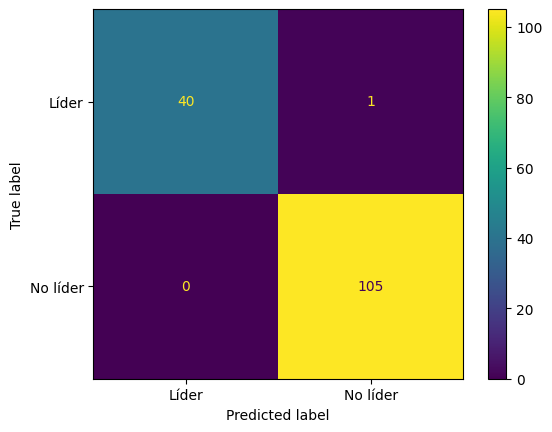

In [45]:
# Visualizando la Matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=arbol.classes_)
disp.plot()
plt.show()

In [46]:
#Evaluamos nuestro modelo y observamos el porcentaje de clasificaciones correctas
print("Precisión del Árbol de Clasificación: ", accuracy_score(test_y, y_pred))


Precisión del Árbol de Clasificación:  0.9931506849315068


In [47]:
#Visualización del Árbol de Clasificación
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = "arbol.png" #Asignamos el nombre de archivo a nuestro árbol
featureNames = data.columns[0:6] #Seleccionamos las características
targetNames = data["lider"].unique().tolist()  #Seleccionamos nuestras etiquetas
out=tree.export_graphviz(arbol,feature_names=featureNames, out_file=dot_data, class_names = np.unique(train_y), filled=True)

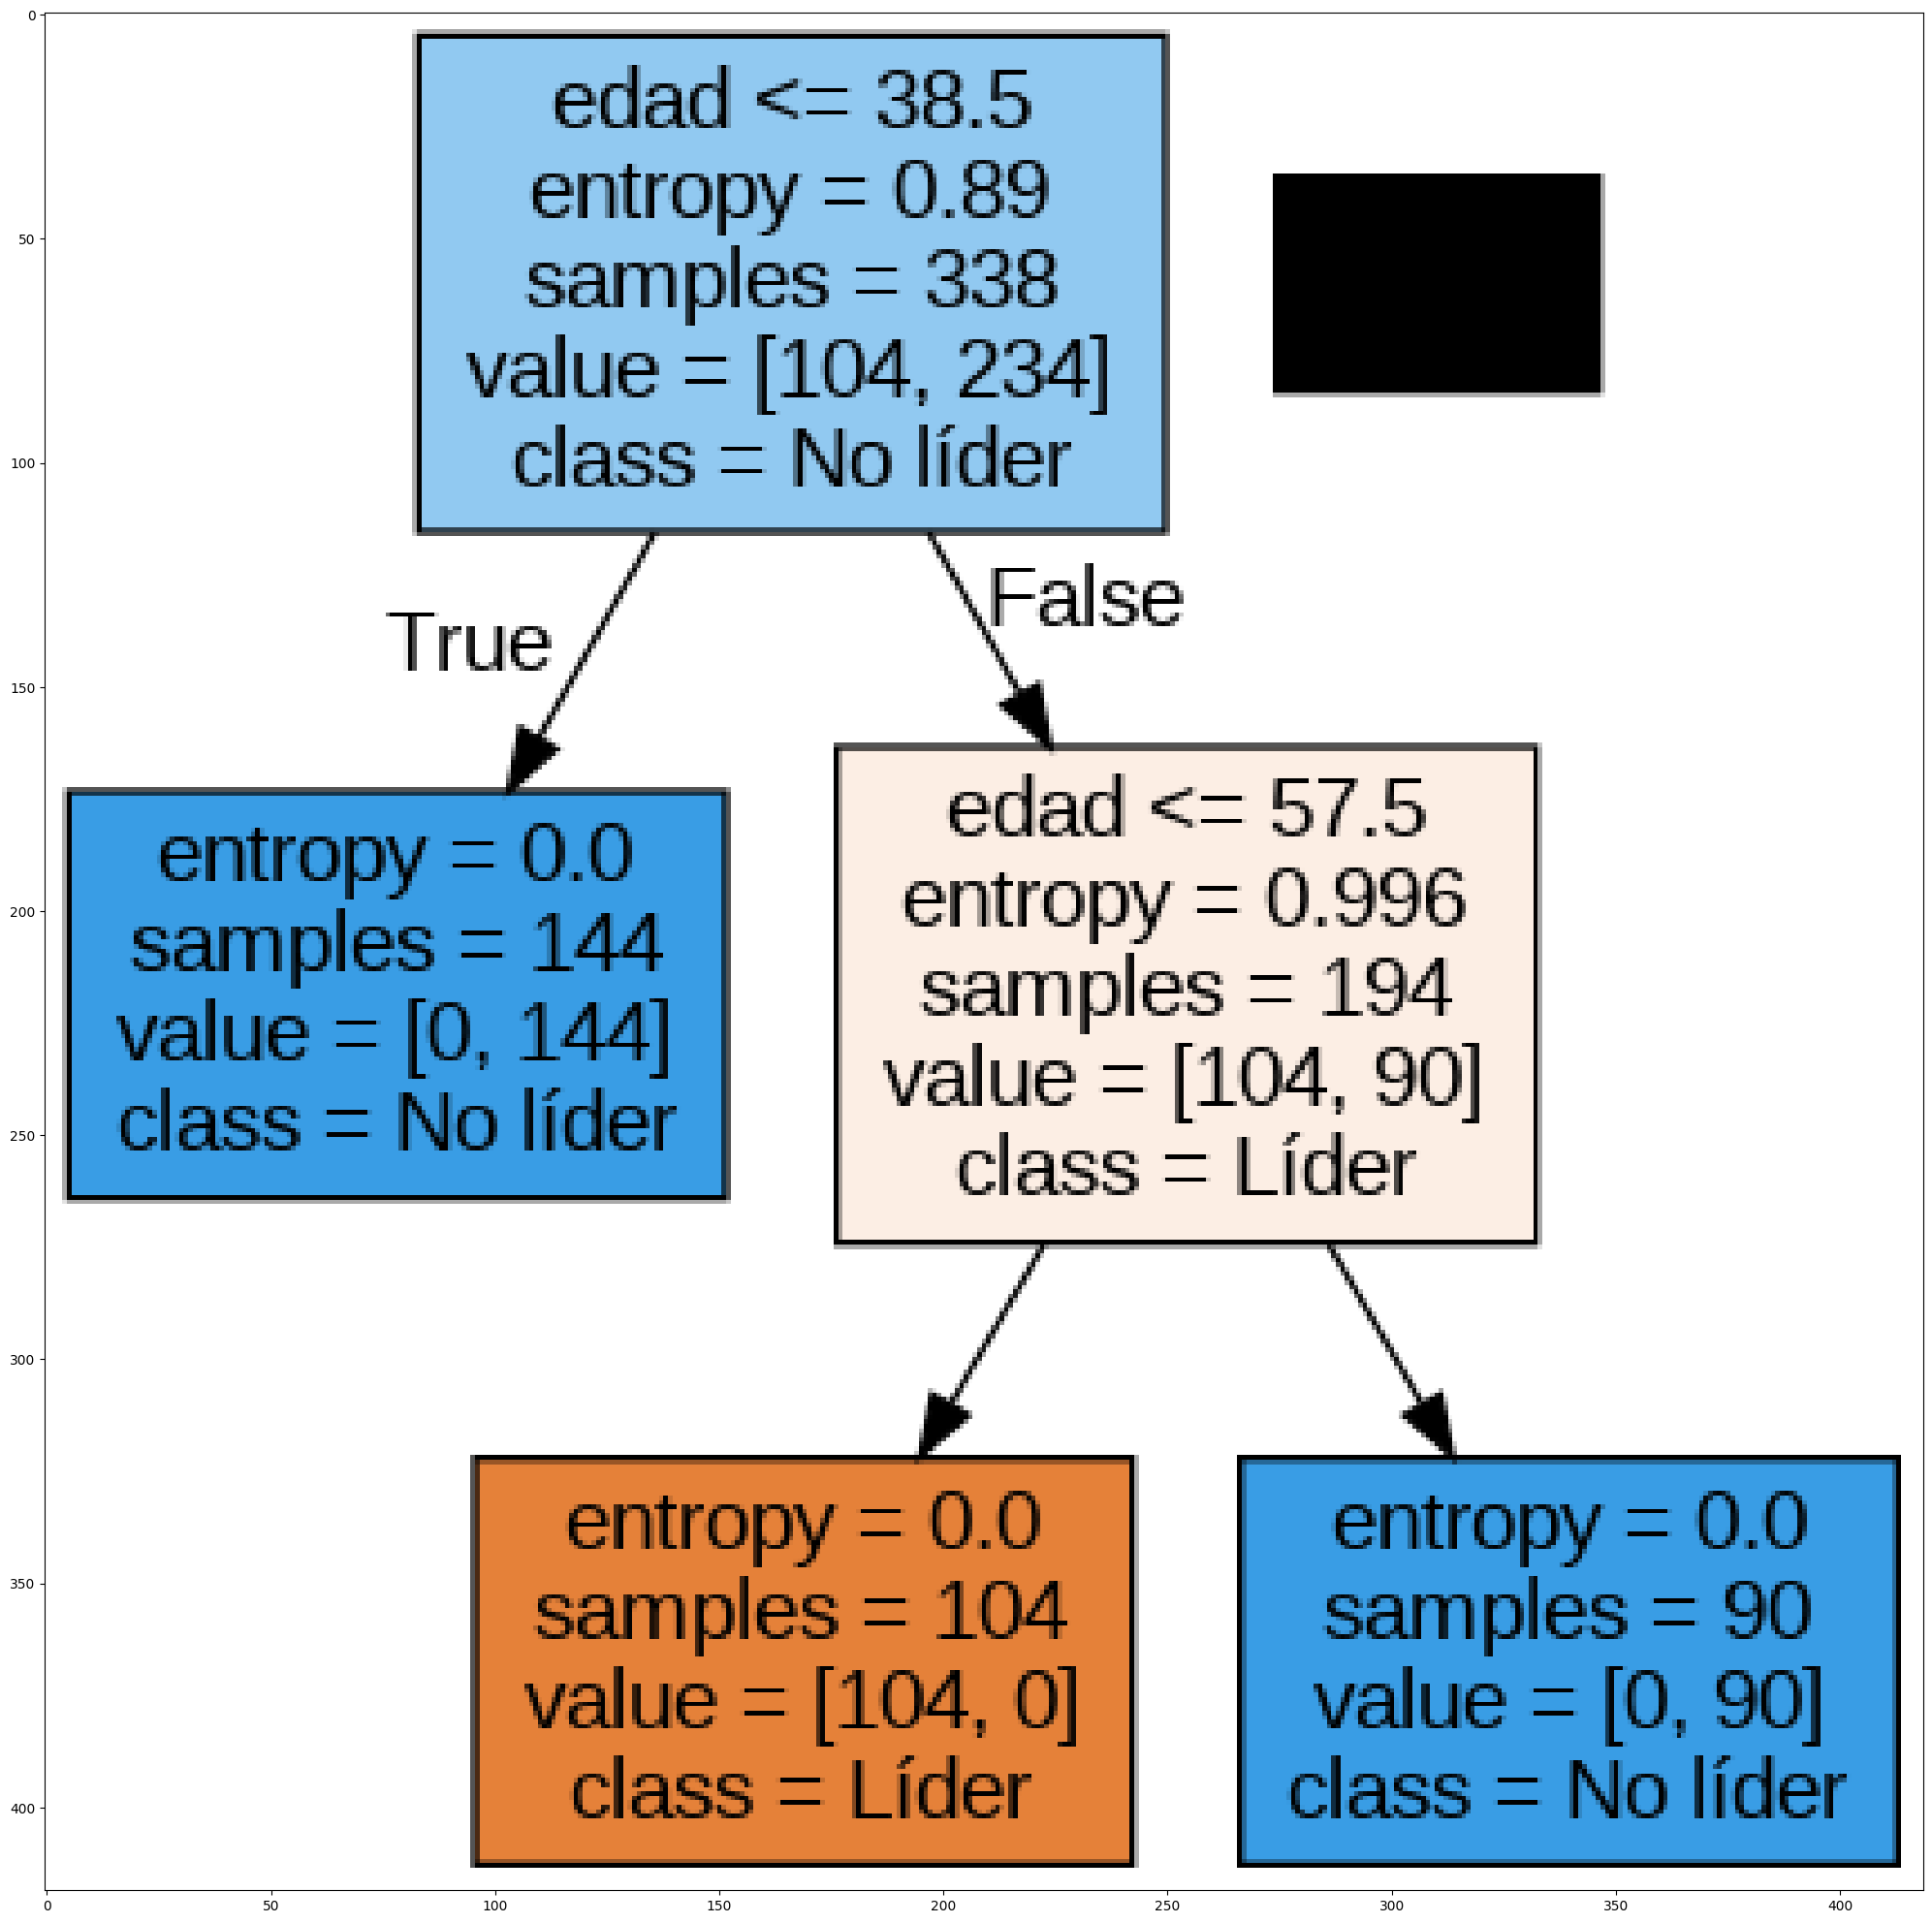

In [48]:
#Exportamos nuestro árbol de clasificación
graph = pydotplus.graph_from_dot_data (dot_data.getvalue())
graph.write_png(filename) #Asignamos un nombre a nuestro árbol
img = mpimg.imread(filename) #Leemos nuestro árbol
plt.figure(figsize=(25,50))
plt.imshow(img,interpolation='nearest') #Mostramos el árbol